In [1]:
import numpy
from matplotlib.pyplot import *
%matplotlib inline
import scipy
from scipy import integrate
from astropy.cosmology import Planck15 as cosmo

In [2]:
import numpy

This code plots Schechter Luminosity Functions for different emission lines in different papers.  
Comparat et al 2016 plots [OII] 3726/3729, Hbeta 4861, and [OIII] 5007
[OIII] 5007 is always 3 times stronger than [OIII] 4959
Sobral et al 2013 plots Halpha 6563
Ciardullo et al 2012 plots Lymanalpha 1216
(units are in Angstroms):
[OII] 3726/3729 unresolved doublet, Hbeta 4861, [OIII] 4959/5007, Halpha 6563, Lymanalpha 1216
Plot Schechter Luminosity Function for which emission line?  (sample input: Halpha)Lymanalpha
emline =  Lymanalpha
This following plot will contain a Lymanalpha LF from Ciardullo et al 2012.  
z = 3.113 and alpha = -1.65 are plotted, 
the values with errors given in the Ciardullo et al 2012 paper are:
Lstar_exp =   42.76 (+0.10 -0.10)
phistar_exp = -3.17 (+0.05 -0.05)
z = 2.063 and alpha = -1.65 are plotted, 
the values with errors given in the Ciardullo et al 2012 paper are:
Lstar_exp =   42.33 (+0.12 -0.12)
phistar_exp = -2.86 (+0.05 -0.05)
alpha =  -1.65
z =  3.113

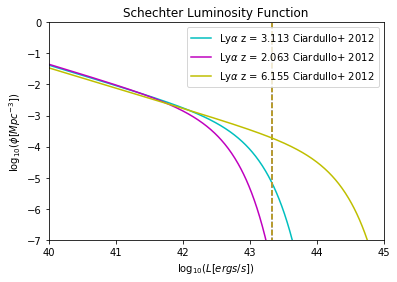

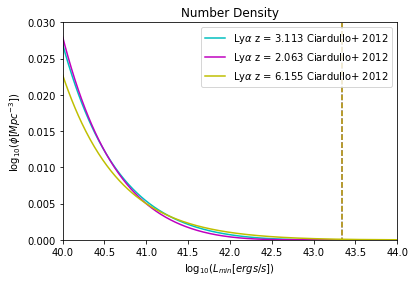

In [3]:
print("This code plots Schechter Luminosity Functions for different emission lines in different papers.  ")
print("Comparat et al 2016 plots [OII] 3726/3729, Hbeta 4861, and [OIII] 5007")
print("[OIII] 5007 is always 3 times stronger than [OIII] 4959")
print("Sobral et al 2013 plots Halpha 6563")
print("Ciardullo et al 2012 plots Lymanalpha 1216")

print("(units are in Angstroms):")
print("[OII] 3726/3729 unresolved doublet, Hbeta 4861, [OIII] 4959/5007, Halpha 6563, Lymanalpha 1216")
emline = input("Plot Schechter Luminosity Function for which emission line?  (sample input: Halpha)")
print("emline = ", emline)


#JULIETTE:
#THE FIRST PART OF THIS CODE DEFINES FUNCTIONS THAT WILL THEN BE USED LATER ON IN THE CODE

#the functions are:

#lineqLya - which is what I used to interpolate/extrapolate values for the Lyman alpha line

#filter_int - which finds the central wavelength, actually called the median transmission wavelength, of each filter

#lumlim - which calculates the luminosity limit for a each band with a 5 sigma detection limit

#schechter_LF - which basically (among calling the other functions to get useful values) plots the Schechter luminosity function for
#an Extreme Emission Line galaxy sample and then integrates it to get a number density for specific redshifts (then plots both)

#remind me to read off the (digital) poster too in order to explain things clearly
#also, I know I print out a ridiculous amount of text; this was to enable continual double-checking and debugging, and I mean to adjust that at some point XD


def lineqLya(z):

	#this is used for the Lymanalpha line
	#finds linear equation from two points in Ciardullo et al. 2012 paper and interpolates/extraoplates to find Lstar and phistar for different z values

	z1 = 3.113
	z2 = 2.063
	deltaz = z1 - z2

	Lstar1 = 42.76
	Lstar2 = 42.33

	phistar1 = -3.17
	phistar2 = -2.86

	mLstar = (Lstar1 - Lstar2)/(deltaz)
	mphistar = (phistar1 - phistar2)/(deltaz)

	bLstar = Lstar1 - mLstar*z1
	bphistar = phistar1 - mphistar*z1

	#check to make sure values give same as original
	#Lstartest1 = mLstar*z1 + bLstar
	#Lstartest2 = mLstar*z2 + bLstar
	#phistartest1 = mphistar*z1 + bphistar
	#phistartest2 = mphistar*z2 + bphistar
	#print("Lstar1, Lstar 2 = ",Lstartest1,Lstartest2)
	#print("phistar1, phistar2 = ",phistartest1,phistartest2)

	print("Lstar for Lymanalpha: Lstar = z*",mLstar," + ",bLstar)
	print("phistar for Lymanalpha: phistar = z*",mphistar," + ",bphistar)

	LstarLya = mLstar*z + bLstar
	phistarLya = mphistar*z + bphistar

	print("LstarLya =",LstarLya)
	print("phistarLya =",phistarLya)

	answers = [LstarLya,phistarLya]

	return answers


#the following function calculates the luminosity limit for a certain band with a certain detection limit
def lumlim(z,em):

	print("This function will calculate the luminosity that corresponds to a 5 sigma detection, in erg/s:")
	print("INFO: 26.2 is AB magnitude for 5 sigma detection limit in the z band")
	#first I calculate the flux, then convert to flux density, then find the luminosity limit for the conditions printed above

	#the following calculates values I use in and plug into the lumlim function
	lambdalow = 818.95 #in nm
	lambdahigh = 921.15 #in nm
	#lambdacenter = (lambdalow+lambdahigh)/2 #in nm
	#lambdaemitted = #will be one of the three emission lines #in nm
	#zendlow = (lambdalow/lambdaemitted)-1
	#zendhigh = (lambdahigh/lambdaemitted)-1
	#zcenter = (lambdacenter/lambdaemitted)-1

	#finds the flux density
	print("ABmagnitude = -2.5*log10(fluxdensity/(3631 Jansky))")
	print("consequently:")
	#print("fluxdensity = (10**(ABmagnitude/(-2.5)))*(3631 Janksy)")
	#fluxdens = (10**(ABmag/(-2.5)))*3631 #outputs in Jansky
	ABmag = 26.2
	fluxdens = 10**((ABmag+48.6)/(-2.5)) #outputs in erg/(s*Hz*(cm^2))
	print("flux density =",fluxdens,"erg/(s*Hz*(cm^2))")

	#finds the flux using the difference between the frequencies at each end of the band
	c = 2.9979*(10**17) #in nm/s
	deltanu = c*((1/lambdalow)-(1/lambdahigh)) #the nm should cancel out
	print("deltanu =",deltanu,"s^-1")
	flux = fluxdens*deltanu#*(10**(-23)) #the extra factor converts from Janskys to ergs/(s*Hz*(cm^2))
	print("flux =",flux,"erg/(s*(cm^2))")

	#finds the luminosity distance
	lumdist = cosmo.luminosity_distance(z)
	#this outputs a special object that keeps track of units, so first I convert it to cm (cgs units), and then I convert it to a regular number
	lumdist_cgs = lumdist.to('cm')
	lumdist_unitless = lumdist_cgs.value
	print("the luminosity distance for redshift z =",z,"is lumdist =",lumdist_unitless,"cm")

	#finds the luminosity limit
	print("Luminosity = 4*pi*(luminositydistance**2)*flux")
	lumlimit = 4*numpy.pi*(lumdist_unitless**2)*flux
	print("luminosity limit for 5 sigma detection of",em,"in z band is",lumlimit,"ergs/s")

	#using return makes the main output of this function the value of lumlimit so that I can use it to calculate other things when I call this function
	return lumlimit


#the following defines and plots the Schechter luminosity function for a chosen emission line along with a separate plot of the number density
#it also calculates the number density above a luminosity limit calculated for a specific band in the previous function
#to use this function, type schechter_LF(z=redshifttoplot) or with additional parameters you want to change inside the ()
def schechter_LF(z,lambdaemitted,alpha,Lstar0,betaL,phistar0,betaphi,zpaper,param,fluxscale,em,style = ""):

	print("alpha = ", alpha)
	print("z = ", z)

	test = numpy.arange(30,55,0.01)
	L = (10**test)

	#I have two different parametrizations for Lstar and phistar; the first one is from Comparat et al 2016, and the second one is from Sobral et al 2015

	if param == "first":

		Lstar = fluxscale*Lstar0*((1+z)**betaL)
		print("Lstar = ", Lstar)

		phistar = phistar0*((1+z)**betaphi)
		print("phistar = ", phistar)

	if param == "second":

		Lstar = 10**(0.45*z + Lstar0)
		print("Lstar = ", Lstar)

		phistar = 10**(-0.38*(z**2) + z + phistar0)
		print("phistar = ", phistar)

	if param == "third": #THIS NEEDS TO BE FIXED

		answersLya = lineqLya(z)

		Lstar = answersLya[0] #this is linearly parametrized from Ciardullo+ 2012
		print("Lstar = ",Lstar)

		phistar = answersLya[1] #this is linearly parametrized from Ciardullo+ 2012
		print("phistar = ",phistar)

	phi = phistar*((L/Lstar)**(alpha+1))*(numpy.e**(-L/Lstar))
	print("Note: Each paper uses a slightly different convention; I decided to consolidate them with the following:")
	print("using the LF equation with the alpha+1 exponent as follows: ")
	print("phi = phistar*((L/Lstar)**(alpha+1))*(numpy.e**(-L/Lstar))")

	#this deletes parts of the arrays that are so small python counts them as zero; otherwise, I would not be able to take the logarithm of the array
	L = L[numpy.where(phi!=0)]
	phi = phi[numpy.where(phi!=0)]
	testarray = test[numpy.where(phi!=0)]

	log10L = numpy.log10(L)
	log10phi = numpy.log10(phi)

	#the following calculates values I use in and plug into the lumlim function
	lambdalow = 818.95 #in nm
	lambdahigh = 921.15 #in nm
	lambdacenter = (lambdalow+lambdahigh)/2 #in nm #NO THIS IS NOT CORRECT, FIX THIS
	#lambdaemitted = #will be one of the three emission lines #in nm
	zendlow = (lambdalow/lambdaemitted)-1
	zendhigh = (lambdahigh/lambdaemitted)-1
	zcenter = (lambdacenter/lambdaemitted)-1
	deltaz = zendhigh-zendlow
	print("for",em,"deltaz =",deltaz)

	#finds luminosity limit in center of z band
	center = lumlim(z = zcenter,em = em)
	#why did I have it reprint out: print("luminosity limit for the center of the z band with a 5 sigma detection limit is",center,"erg/s") ?

	lumarray = numpy.full(15,numpy.log10(center))
	yarray = numpy.arange(-10,5,1)

	figure(1)
	plot(log10L,log10phi,style,label = zpaper)
	plot(lumarray,yarray,style+"--")
	xlim(40,45)
	ylim(-7,0)
	legend(loc = "upper right")
	#LaTeX is used with $ signs in the titles below
	xlabel("$\log_{10}(L [ergs/s])$")
	ylabel("$\log_{10}(\phi [\t{Mpc}^{-3}])$")
	title("Schechter Luminosity Function") #emline+
	print("z = ", z, " and alpha = ", alpha, " are plotted, ")
	#saves image
	#plot.savefig('/home/Desktop/fig1.png',bbox_inches = 'tight')

	print("now the number density is calculated by integrating the LF using cumtrapz:")
	#cumptrapz integrates the opposite way than I need to integrate, so I flip it twice in the process
	phiflip = phi[::-1]
	phiflipint = scipy.integrate.cumtrapz(phiflip,x=testarray)
	num_dens = phiflipint[::-1]

	Lmin = numpy.delete(L,(len(L)-1))
	#shifted_Lmin = Lmin*fluxscale
	log10Lmin = numpy.log10(Lmin)
	#log10shifted_Lmin = numpy.log10(shifted_Lmin)

	figure(2)
	plot(log10Lmin,num_dens,style,label = zpaper)
    #show()
	plot(lumarray,yarray,style+"--")
    #show()
	legend(loc = "upper right")
	xlim(40,44)
	ylim(0,0.03)
	#LaTeX is used with $ signs in the titles below
	xlabel("$\log_{10}(L_{min} [ergs/s])$")
	ylabel("$\log_{10}(\phi [\t{Mpc}^{-3}])$")
	title("Number Density") #emline+
	#saves image
	#plot.savefig('/home/Desktop/fig2.png',bbox_inches = 'tight')

	#the following finds the comoving number density above a certain detection limit (shot noise limit),
	#which I calculated in the previous part of the code (also shown below), where I saved the variable named center

	#runs through the LF code for chosen emission line
	#then gets number density above the luminosity limit using the center value

	#first, I have to shorten the phi array to contain only values above the luminosity limit

	#uses astropy.cosmology.Planck15 to find comoving volume in shell between redshifts at each end of the z filter
	comovingvolmin = cosmo.comoving_volume(zendlow) #units are in Mpc^3
	comovingvolmax = cosmo.comoving_volume(zendhigh) #units are in Mpc^3
	comovingvol = comovingvolmax-comovingvolmin
	comovingvol = comovingvol.value
	print("comovingvol =",comovingvol,"Mpc^3")

	#shortens the array to be above the luminosity limit, then integrates to get comoving number density
	philim = phi[numpy.where(L>center)]
	testarraydos = test[numpy.where(L>center)]
	comovingphi = scipy.integrate.trapz(philim,x=testarraydos)
	print("comovingphi =",comovingphi,"Mpc^-3") #units?  

	#finds total number of galaxies and areal number density
	totalnumgalaxies = comovingphi*comovingvol
	arealphi = totalnumgalaxies/(4*numpy.pi)
	print("arealphi =",arealphi,"steradian^-1")

	#show()


if emline == "test":

	#this was used to print out data and plots for the LSST-DESC conference poster

	print("This option finds comoving and areal number densities for:")
	print("[OII] 3726/3729 and [OIII] 5007 from Comparat et al 2016")
	print("Halpha 6563 from Sobral et al 2013")

	lambda_OII = 372.7
	lambda_OIII = 500.7
	lambda_Halpha = 656.3
	lambda_Lymanalpha = 121.6

	#the following calculates values I use in and plug into the lumlim function
	lambdalow = 818.95 #in nm
	lambdahigh = 921.15 #in nm
	lambdacenter = (lambdalow+lambdahigh)/2 #in nm #NO, THIS IS NOT CORRECT, FIX THIS
	#lambdaemitted = #will be one of the three emission lines #in nm
	#zendlow = (lambdalow/lambdaemitted)-1
	#zendhigh = (lambdahigh/lambdaemitted)-1
	#zcenter = (lambdacenter/lambdaemitted)-1

	#finds redshift of emission line at center of z band -> use to find LF
	zOII = (lambdacenter/lambda_OII)-1
	zOIII = (lambdacenter/lambda_OIII)-1
	zHalpha = (lambdacenter/lambda_Halpha)-1
	zLymanalpha = (lambdacenter/lambda_Lymanalpha)-1

	#schechter_LF(z=zOII,alpha = -1.46,Lstar0 = 10**41.1,betaL = 2.33,phistar0 = 10**(-2.4),betaphi = -0.73,param = "first",zpaper = "z = "+str(zOII)+" Comparat+ 2016",fluxscale = 1,style = "r")
	#schechter_LF(z=zOIII,alpha = -1.83,Lstar0 = 10**41.42,betaL = 3.91,phistar0 = 10**(-3.41),betaphi = -0.76,param = "first",zpaper = "z = "+str(zOIII)+" Comparat+ 2016",fluxscale = 1,style = "g")
	#schechter_LF(z = zHalpha,alpha = -1.6,Lstar0 = 41.87,betaL = 0,phistar0 = -3.18,betaphi = 0,param = "second",zpaper = "z = "+str(zHalpha)+" Sobral+ 2013",fluxscale = 1,style = "b")

	schechter_LF(z=zOII,lambdaemitted = lambda_OII,alpha = -1.46,Lstar0 = 10**41.1,betaL = 2.33,phistar0 = 10**(-2.4),betaphi = -0.73,param = "first",zpaper = "[OII] z = 1.33 Comparat+ 2016",fluxscale = 1,em = "[OII]",style = "r")
	schechter_LF(z=zOIII,lambdaemitted = lambda_OIII, alpha = -1.83,Lstar0 = 10**41.42,betaL = 3.91,phistar0 = 10**(-3.41),betaphi = -0.76,param = "first",zpaper = "[OIII] z = 0.74 Comparat+ 2016",fluxscale = 1,em = "[OIII]",style = "g")
	schechter_LF(z=zHalpha,lambdaemitted = lambda_Halpha,alpha = -1.6,Lstar0 = 41.87,betaL = 0,phistar0 = -3.18,betaphi = 0,param = "second",zpaper = r"H$\alpha$ z = 0.33 Sobral+ 2013",fluxscale = 1, em = "Halpha",style = "b")
	#the following is also from the separate linearequation code that I tried to put in this one, but it throws back errors every time I use the "third" option, so I have to fix that later
	schechter_LF(z=zLymanalpha,lambdaemitted = lambda_Lymanalpha,alpha = -1.65,Lstar0 = 10**44.0057781641604,betaL = 0,phistar0 = 10**(-4.068119141604011),betaphi = 0,param = "first",zpaper = r"Ly$\alpha$ z = 6.155 Ciardullo+ 2012",fluxscale = 1,em = "Lymanalpha",style = "y")
 	#used LaTex above for legend
 	#python recognizes LaTeX instead of thinking they're escape characters if I write it as a "raw" string, denoting it with an r in the beginning of the line


if emline == "Lymanalpha":

	print("This following plot will contain a Lymanalpha LF from Ciardullo et al 2012.  ")
 	#either this needs to be combined with the "test" option, or I need to edit the rest of these emline options to be usable with all the different parameters

	lambda_OII = 372.7
	lambda_OIII = 500.7
	lambda_Halpha = 656.3
	lambda_Lymanalpha = 121.6

	#the following calculates values I use in and plug into the lumlim function
	lambdalow = 818.95 #in nm
	lambdahigh = 921.15 #in nm
	lambdacenter = (lambdalow+lambdahigh)/2 #in nm #NO, THIS IS NOR CORRECT, FIX IT
	#lambdaemitted = #will be one of the three emission lines #in nm
	#zendlow = (lambdalow/lambdaemitted)-1
	#zendhigh = (lambdahigh/lambdaemitted)-1
	#zcenter = (lambdacenter/lambdaemitted)-1

	#finds redshift of emission line at center of z band -> use to find LF
	zOII = (lambdacenter/lambda_OII)-1
	zOIII = (lambdacenter/lambda_OIII)-1
	zHalpha = (lambdacenter/lambda_Halpha)-1
	zLymanalpha = (lambdacenter/lambda_Lymanalpha)-1

	#for the first redshift below
	print("z = 3.113 and alpha = -1.65 are plotted, ")
	print("the values with errors given in the Ciardullo et al 2012 paper are:")
	print("Lstar_exp =   42.76 (+0.10 -0.10)")
	print("phistar_exp = -3.17 (+0.05 -0.05)")

	#for the second redshift below
	print("z = 2.063 and alpha = -1.65 are plotted, ")
	print("the values with errors given in the Ciardullo et al 2012 paper are:")
	print("Lstar_exp =   42.33 (+0.12 -0.12)")
	print("phistar_exp = -2.86 (+0.05 -0.05)")

	schechter_LF(z=3.113,lambdaemitted = lambda_Lymanalpha,alpha = -1.65,Lstar0 = 10**42.76,betaL = 0,phistar0 = 10**(-3.17),betaphi = 0,param = "first",zpaper = r"Ly$\alpha$ z = 3.113 Ciardullo+ 2012",fluxscale = 1,em = "Lymanalpha",style = "c")
	schechter_LF(z=2.063,lambdaemitted = lambda_Lymanalpha,alpha = -1.65,Lstar0 = 10**42.33,betaL = 0,phistar0 = 10**(-2.86),betaphi = 0,param = "first",zpaper = r"Ly$\alpha$ z = 2.063 Ciardullo+ 2012",fluxscale = 1,em = "Lymanalpha",style = "m")
	#the following is also from the separate linearequation code that I tried to put in this one, but it throws back errors every time I use the "third" option, so I have to fix that later
	schechter_LF(z=6.155016447368421,lambdaemitted = lambda_Lymanalpha,alpha = -1.65,Lstar0 = 10**44.0057781641604,betaL = 0,phistar0 = 10**(-4.068119141604011),betaphi = 0,param = "first",zpaper = r"Ly$\alpha$ z = 6.155 Ciardullo+ 2012",fluxscale = 1,em = "Lymanalpha",style = "y")